# **Question 1a**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.colors
from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
points1 = pd.read_csv("/content/points.txt", sep=" ")
points = np.loadtxt("/content/points.txt", dtype=float)
print(points)
points.shape

[[-0.18499166 -0.57554287]
 [ 0.23985533 -0.92359283]
 [-0.05489109 -0.05299839]
 ...
 [-0.42331549  0.63802215]
 [ 0.01330265 -0.82599817]
 [-0.15392103  0.97118776]]


(4000, 2)

In [ ]:
pointLabels1 = pd.read_csv("/content/labels.txt", sep=" ")
pointLabels = np.loadtxt("/content/labels.txt", dtype=float)
print(pointLabels)
pointLabels.shape

[2. 2. 3. ... 1. 2. 0.]


(4000,)

In [ ]:
print(points.shape, pointLabels.shape)

(4000, 2) (4000,)


In [ ]:
x=points1.iloc[:,0].values
y=points1.iloc[:,1].values
C=pointLabels1.iloc[:,0].values
x.shape
y.shape
C.shape


(3999,)

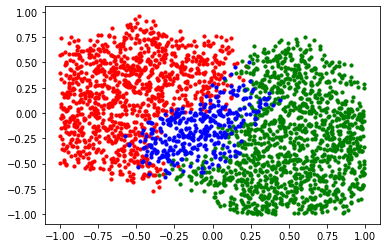

In [ ]:
def lim(points1, gap):
    low  = min(points1)
    high = max(points1)
    span = high - low

    return low - span*gap/2, high + span*gap/2

colors = [ 'red', 'green', 'blue','cyan']
for i, c in enumerate(colors):
    ind = C == (i+1)
    plt.scatter(x[ind], y[ind], c=c, s=10)
   
plt.show()

In [ ]:
def question1a(points,pointLabels):
    if 'points' in locals():
        assert type(points) == np.ndarray, 'points is not a numpy array'
        assert points.shape == (4000,2),'points array is not of the expected size'
    else:
        raise Exception('points array not defined')
        
    if 'pointLabels' in locals():
        assert type(pointLabels) == np.ndarray, 'pointLabels is not a numpy array'
        assert pointLabels.shape == (4000,),'pointLabels array is not of the expected size'
    else:
        raise Exception('pointLabels array not defined')
        
    print('points and labels seem to be defined properly')

In [ ]:
question1a(points,pointLabels)

points and labels seem to be defined properly


# **Question 1b**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, pointsTest, y_train, pointLabelsTest = train_test_split(points, pointLabels, test_size=0.5)

In [ ]:
pointsTrain, pointsVal, pointLabelsTrain, pointLabelsVal = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
def question1b(pointsTrain,pointsVal,pointsTest,pointLabelsTrain,pointLabelsVal,pointLabelsTest):
    if 'pointsTrain' in locals():
        assert type(pointsTrain) == np.ndarray, 'pointsTrain is not a numpy array'
        assert pointsTrain.shape == (1600,2),'pointsTrain array is not of the expected size'
    else:
        raise Exception('pointsTrain array not defined')
        
    if 'pointsVal' in locals():
        assert type(pointsVal) == np.ndarray, 'pointsVal is not a numpy array'
        assert pointsVal.shape == (400,2),'pointsVal array is not of the expected size'
    else:
        raise Exception('pointsVal array not defined')
        
    if 'pointsTest' in locals():
        assert type(pointsTest) == np.ndarray, 'pointsTest is not a numpy array'
        assert pointsTest.shape == (2000,2),'pointsTest array is not of the expected size'
    else:
        raise Exception('pointsTest array not defined')
        
    if 'pointLabelsTrain' in locals():
        assert type(pointLabelsTrain) == np.ndarray, 'pointLabelsTrain is not a numpy array'
        assert pointLabelsTrain.shape == (1600,),'pointLabelsTrain array is not of the expected size'
    else:
        raise Exception('pointLabelsTrain array not defined')
        
    if 'pointLabelsVal' in locals():
        assert type(pointLabelsVal) == np.ndarray, 'pointLabelsVal is not a numpy array'
        assert pointLabelsVal.shape == (400,),'pointLabelsVal array is not of the expected size'
    else:
        raise Exception('pointLabelsVal array not defined')
        
    if 'pointLabelsTest' in locals():
        assert type(pointLabelsTest) == np.ndarray, 'pointLabelsTest is not a numpy array'
        assert pointLabelsTest.shape == (2000,),'pointLabelsTest array is not of the expected size'
    else:
        raise Exception('pointLabelsTest array not defined')
        
    print('Training validation and test sets seem to be defined properly')

In [ ]:
question1b(pointsTrain,pointsVal,pointsTest,pointLabelsTrain,pointLabelsVal,pointLabelsTest)

Training validation and test sets seem to be defined properly


# **Question 1c**

In [ ]:
pointsTrain=np.loadtxt('/content/points.txt')
pointLabelTrain=np.loadtxt('/content/labels.txt')

import tensorflow as tf
hiddenUnits = [256,512]
hiddenLayers=[1,2]
for layers in hiddenLayers:
  for units in hiddenUnits:
    model=tf.keras.Sequential()
    for i in range(layers):
      model.add(tf.keras.layers.Dense(units,activation='relu'))
    model.add(tf.keras.layers.Dense(4,activation='softmax'))

      
    model.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics='accuracy')
    model.fit(pointsTrain,
                pointLabelTrain,
                epochs=2)
    lossVal, accVal=model.evaluate(pointsVal,pointLabelsVal)
    if units==hiddenUnits[0]:
        modelOpt=model
        lossOpt=lossVal
        accOpt=accVal
        unitsOpt=units
        layersOpt=layers
    else:
      if accVal>accOpt:
          modelOpt=model
          lossOpt=lossVal
          accOpt=accVal
          unitsOpt=units
          layersOpt=layers

print(unitsOpt)
print(modelOpt.layers[0].units)


Epoch 1/2
125/125 [==============================] - 1s 4ms/step - loss: 0.9562 - accuracy: 0.6862
Epoch 2/2
13/13 [==============================] - 1s 40ms/step - loss: 0.6240 - accuracy: 0.7425
Epoch 1/2
125/125 [==============================] - 1s 2ms/step - loss: 0.8646 - accuracy: 0.6957
Epoch 2/2
13/13 [==============================] - 1s 96ms/step - loss: 0.5698 - accuracy: 0.7700
Epoch 1/2
125/125 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.7330
Epoch 2/2
13/13 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8300
Epoch 1/2
125/125 [==============================] - 2s 10ms/step - loss: 0.6085 - accuracy: 0.7590
Epoch 2/2
13/13 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.8475
512
512


In [ ]:
lossTest, accTest = modelOpt.evaluate(pointsTest,  pointLabelsTest)

63/63 [==============================] - 1s 13ms/step - loss: 0.3132 - accuracy: 0.8690


In [ ]:
def question1c(layersOpt,unitsOpt,lossOpt,accOpt,modelOpt,pointsVal,pointLabelsVal):
    if 'layersOpt' in locals():
        assert type(layersOpt) == int, 'layersOpt is not an integer'
    else:
        raise Exception('layersOpt not defined')
        
    if 'unitsOpt' in locals():
        assert type(unitsOpt) == int, 'unitsOpt is not an integer'
    else:
        raise Exception('unitsOpt not defined')
    
    if 'lossOpt' in locals():
        assert type(lossOpt) == float, 'lossOpt is not a float'
    else:
        raise Exception('lossOpt not defined')
        
    if 'accOpt' in locals():
        assert type(accOpt) == float, 'accOpt is not a float'
    else:
        raise Exception('accOpt not defined')
        
    if 'modelOpt' in locals():
        assert type(modelOpt) == tf.keras.Sequential, 'modelOpt is not a keras model'
        assert len(modelOpt.layers)==layersOpt+1,'The number of hidden layers in the model is not the same as variable unitsOpt'
        assert modelOpt.layers[0].units==unitsOpt,'The number of units in the model is not the same as variable unitsOpt'
        
        assert len(modelOpt.layers) in [2,3,5], 'The number of hidden layers in the model is outside the specified values'
        assert modelOpt.layers[0].units in [64,128,256,512], 'The number of hidden units in the model is outside the specified values'
        
        lossVal, accVal = modelOpt.evaluate(pointsVal,  pointLabelsVal)
        
        assert lossVal==lossOpt and accVal==accOpt, 'The accuracy of the model is different than what is stored in accOpt'
        
        assert accVal>0.8, 'The accuracy of your model seems very low. Make sure you have trained it properly.'
    else:
        raise Exception('modelOpt array not defined')
        
    print('The keras model seems to be defined properly!')

In [ ]:
question1c(layersOpt,unitsOpt,lossOpt,accOpt,modelOpt,pointsVal,pointLabelsVal)

13/13 [==============================] - 1s 44ms/step - loss: 0.3329 - accuracy: 0.8475
The keras model seems to be defined properly!


# **Question 1d**

In [ ]:
y_predict= modelOpt.predict(pointsTest)
pred = np.argmax(y_predict,axis=1)

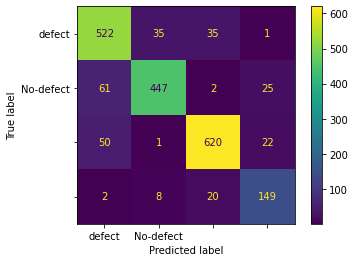

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

pointsConfusionMatrix=confusion_matrix(pointLabelsTest,pred)

classLabels = ['defect','No-defect']

pointsConfusionMatrixPlot = ConfusionMatrixDisplay(confusion_matrix=pointsConfusionMatrix, display_labels=classLabels)

pointsConfusionMatrixPlot.plot()

In [ ]:
def question1d(accTest,accOpt,lossTest,pointsConfusionMatrix,pointsConfusionMatrixPlot):
    if 'accTest' in locals():
        assert type(accTest) == float, 'accTest is not an float'    
        assert accTest>accOpt-0.04, 'Your test accuracy seems significantly smaller than your validation accuracy. Make sure your model is trained properly.'
    else:
        raise Exception('accTest not defined')
        
    if 'lossTest' in locals():
        assert type(lossTest) == float, 'lossTest is not an float'
    else:
        raise Exception('lossTest not defined')
        
    if 'pointsConfusionMatrix' in locals():
        assert type(pointsConfusionMatrix) == np.ndarray, 'pointsConfusionMatrix is of the proper type'
        assert pointsConfusionMatrix.shape == (4,4),'pointsConfusionMatrix is not of the expected size'
    else:
        raise Exception('pointsConfusionMatrix not defined')
        
    if 'pointsConfusionMatrixPlot' in locals():
        assert type(pointsConfusionMatrixPlot) == ConfusionMatrixDisplay, 'pointsConfusionMatrixPlot is of the proper type'
    else:
        raise Exception('pointsConfusionMatrixPlot not defined')
        
    print('The test set accuracy and confusion matrix seem to be defined properly.')
    

In [ ]:
question1d(accTest,accOpt,lossTest,pointsConfusionMatrix,pointsConfusionMatrixPlot)

The test set accuracy and confusion matrix seem to be defined properly.


# **Question 1e**

In [ ]:
def plotDecisionBoundary(model,limx=[-1,1],limy=[-1,1],resolution=200, colormap = 'RdBu'):
    '''Function to plot the decision boundary of a tensorflow model as a contour plot.
       model is the model, which should have a predict method
       limx, limy are the limits of the plot in x and y
       resolution is the resolution of the plot in terms of the number of points used per direction
       colormap is the colormap to be used for the contour plot
       The function returns a figure and an axis object'''
    
    #create figure
    fig,ax = plt.subplots(1,1)
    
    #create linspaces with the x and y coordinates of the points to be used for the contour plot
    #the limits and resolution are set to the user provided values
    xPoints = np.linspace(limx[0], limx[1], resolution)
    yPoints = np.linspace(limy[0], limy[1], resolution)
    
    #create a meshgrid from the provided
    xx, yy = np.meshgrid(xPoints, yPoints)
    
    #use model to predict the labels of the generated points
    #ravel and c_ are used to bring the coordinates in the correct shape
    modelPred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #check shape of the output, if the output is twodimensional and the size in the second dimension is more than 1
    #then the ouput is assumed to be provided in terms of probabilities and is converted to class indices using the argmax function
    if len(modelPred.shape)==2 and modelPred.shape[1]!=1:
        modelPred = np.argmax(modelPred,axis=1)
    else:
    #if the output is either onedimensional or the second dimension has size one, 
    #then it is assumed to be labels for binary classification and a 0.5 threshold is applied to convert to binary format
        modelPred = modelPred>0.5
    
    #reshape the labels to the shape of xx and yy so that they can be used for a contour plot
    z = modelPred.reshape(xx.shape)

    #create contour plot
    ax.contourf(xx,yy,z,cmap=colormap,alpha=0.5)
    
    #return figure and axis
    return fig,ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd99f788f50>)

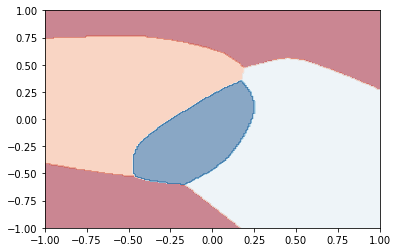

In [ ]:
plotDecisionBoundary(modelOpt,limx=[-1,1],limy=[-1,1],resolution=200, colormap = 'RdBu')

# **Question 2a**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

In [ ]:
get_ipython().system_raw("unrar x /content/casting_data.rar")

In [ ]:
get_ipython().system_raw("unrar x /content/test.rar")

In [ ]:

def loadImageFiles(path, filesPerClass=0, colorFlag=cv2.IMREAD_GRAYSCALE):
    """Function to load load images from athe provided path directory. 
       It is assumed that, within the directory, different folders will
       contain images from different classes. The optional argument filesPerClass
       can be used to select a subset of the total data from each class,
       if the default value of 0 is used, then all the available files are loaded.
       The optional argument colorFlag specifies how the files should be loaded, the default option is
       cv2.IMREAD_UNCHANGED, which will not change the type of the file, but the options
       cv2.IMREAD_COLOR and cv2.IMREAD_GRAYSCALE can also be used to read images as color and
       grayscale respectively.The function returns a numpy array whose first dimension corresponds to different images,
       and an array with the labels"""
    
    #initialise images and labels as empty lists
    images=[]
    labels=[]
    
    #initialise label counter to 0
    label=0
    
    #use os to find the names of all folders within the provided directory
    folders = os.listdir(path)
    
    #loop extracted folders
    for folder in folders:
        print('Loading folder: ', folder)
        
        #path to each folder
        folderPath=os.path.join(path, folder)
        
        #use os to find the names of all files in each folder
        files=os.listdir(folderPath)
        
        #set the number of files to read
        #if the filesPerClass argument is 0, then all available files are loaded
        #otherwise only the first filesPerClass
        if filesPerClass==0:
            nfiles=len(files)
        else:
            nfiles=filesPerClass
        
        #loop files in directory
        for f in files[:nfiles]:
            #path for each file
            filePath=os.path.join(folderPath, f)
            
            #check whether the created path actually contains a file
            if os.path.isfile(filePath):
                #read image using the provided flag for the type of color
                img = cv2.imread(filePath, colorFlag)
                #append image to the images list
                images.append(img)
                #append label to the labels list
                labels.append(label)
        
        #increase label counter
        label+=1
    
    #convert images and labels converted to numpy arrays
    return np.array(images), np.array(labels)

In [ ]:

path='/content/casting_data/train'
imagesTrain,imageLabelsTrain = loadImageFiles(path,filesPerClass = 6633)
imagesTrain.shape


Loading folder:  ok_front
Loading folder:  def_front


(6633, 300, 300)

In [ ]:
path='/content/casting_data/test'
imagesTest,imageLabelsTest = loadImageFiles(path,filesPerClass = 800)
imagesTest.shape

Loading folder:  ok_front
Loading folder:  def_front


(715, 300, 300)

In [ ]:
def question2a(imagesTrain,imageLabelsTrain,imagesTest,imageLabelsTest):
    if 'imagesTrain' in locals():
        assert type(imagesTrain) == np.ndarray, 'imagesTrain is not a numpy array'
        assert imagesTrain.shape == (6633, 300, 300),'imagesTrain array is not of the expected size'
    else:
        raise Exception('imagesTrain array not defined')
        
    if 'imageLabelsTrain' in locals():
        assert type(imageLabelsTrain) == np.ndarray, 'imageLabelsTrain is not a numpy array'
        assert imageLabelsTrain.shape == (6633,),'imageLabelsTrain array is not of the expected size'
    else:
        raise Exception('imageLabelsTrain array not defined')
        
    if 'imagesTest' in locals():
        assert type(imagesTest) == np.ndarray, 'imagesTest is not a numpy array'
        assert imagesTest.shape == (715, 300, 300),'imagesTest array is not of the expected size'
    else:
        raise Exception('imagesTest array not defined')
        
    if 'imageLabelsTest' in locals():
        assert type(imageLabelsTest) == np.ndarray, 'imageLabelsTest is not a numpy array'
        assert imageLabelsTest.shape == (715,),'imageLabelsTest array is not of the expected size'
    else:
        raise Exception('imageLabelsTest array not defined')
        
    print('Images and labels seem to be defined properly.')

In [ ]:
question2a(imagesTrain,imageLabelsTrain,imagesTest,imageLabelsTest)

Images and labels seem to be defined properly.


# **Question 2b**

In [ ]:
imagesTrain, imagesVal, imageLabelsTrain, imageLabelsVal = train_test_split(imagesTrain, imageLabelsTrain, test_size=0.20, random_state=42)


In [ ]:
imagesTest=imagesTest/255.0
imagesTrain=imagesTrain/255.0
imagesTrain=imagesTrain/255.0
imagesVal =imagesVal /255.0

In [ ]:
def question2b(imagesTest,imageLabelsTest,imagesTrain,imageLabelsTrain,imagesVal,imageLabelsVal):
    if 'imagesTest' in locals():
        assert type(imagesTest) == np.ndarray, 'imagesTest is not a numpy array'
        assert imagesTest.shape == (715, 300, 300),'imagesTest array is not of the expected size'
        assert imagesTest.max()<=1 and imagesTest.min()>=0, 'imagesTest is not normalised'
    else:
        raise Exception('imagesTest array not defined')
        
    if 'imageLabelsTest' in locals():
        assert type(imageLabelsTest) == np.ndarray, 'imageLabelsTest is not a numpy array'
        assert imageLabelsTest.shape == (715,),'imageLabelsTest array is not of the expected size'
    else:
        raise Exception('imageLabelsTest array not defined')
    
    if 'imagesTrain' in locals():
        assert type(imagesTrain) == np.ndarray, 'imagesTrain is not a numpy array'
        assert imagesTrain.shape == (5306, 300, 300),'imagesTrain array is not of the expected size'
        assert imagesTrain.max()<=1 and imagesTrain.min()>=0, 'imagesTrain is not normalised'
    else:
        raise Exception('imagesTrain array not defined')
        
    if 'imageLabelsTrain' in locals():
        assert type(imageLabelsTrain) == np.ndarray, 'imageLabelsTrain is not a numpy array'
        assert imageLabelsTrain.shape == (5306,),'imageLabelsTrain array is not of the expected size'
    else:
        raise Exception('imageLabelsTrain array not defined')
    
    
    if 'imagesVal' in locals():
        assert type(imagesVal) == np.ndarray, 'imagesVal is not a numpy array'
        assert imagesVal.shape == (1327, 300, 300),'imagesVal array is not of the expected size'
        assert imagesVal.max()<=1 and imagesVal.min()>=0, 'imagesVal is not normalised'
    else:
        raise Exception('imagesVal array not defined')
        
    if 'imageLabelsVal' in locals():
        assert type(imageLabelsVal) == np.ndarray, 'imageLabelsVal is not a numpy array'
        assert imageLabelsVal.shape == (1327,),'imageLabelsVal array is not of the expected size'
    else:
        raise Exception('imageLabelsVal array not defined')
        
    print('Images labels and training/validation sets seem to be defined properly.')

In [ ]:
question2b(imagesTest,imageLabelsTest,imagesTrain,imageLabelsTrain,imagesVal,imageLabelsVal)

Images labels and training/validation sets seem to be defined properly.


# **Question 2c**

In [ ]:
path='/content/casting_data/test'
imagesTest,imageLabelsTest = loadImageFiles(path,filesPerClass = 800)

Loading folder:  ok_front
Loading folder:  def_front


(715, 300, 300)

In [ ]:
def question2c(imageModel,imageLossTest,imageAccTest,imagesTest,imageLabelsTest):
    imageModel.summary()

    if 'imageLossTest' in locals():
        assert type(imageLossTest) == float, 'imageLossTest is not a float'
    else:
        raise Exception('imageLossTest not defined')
        
    if 'imageAccTest' in locals():
        assert type(imageAccTest) == float, 'imageAccTest is not a float'
    else:
        raise Exception('imageAccTest not defined')
        
    if 'imageModel' in locals():
        assert type(imageModel) == tf.keras.Sequential, 'imageModel is not a keras model'
        
        #assert len(modelOpt.layers) in [2,3,5], 'The number of hidden layers in the model is outside the specified values'
        #assert modelOpt.layers[1].units in [64,128,256,512], 'The number of hidden units in the model is outside the specified values'
    
        assert type(imageModel.layers[0])==tf.keras.layers.Conv2D, 'The first layer of your network should be convolutional'
        assert type(imageModel.layers[1])==tf.keras.layers.MaxPooling2D, 'The second layer of your network should be max pooling'
        assert type(imageModel.layers[2])==tf.keras.layers.Conv2D, 'The third layer of your network should be convolutional'
        assert type(imageModel.layers[3])==tf.keras.layers.MaxPooling2D, 'The fourth layer of your network should be max pooling'
        
        imageLossTestRef, imageAccTestRef = imageModel.evaluate(imagesTest,  imageLabelsTest)
        
        assert imageAccTest==imageAccTestRef, 'The value stored in imageAccTest seems to be different than the accuracy of your model for the test set.'
        
        assert imageAccTestRef>0.95, 'The accuracy of your model seems very low. Make sure you have trained it properly.'
    else:
        raise Exception('imageModel array not defined')
        
    print('The keras model seems to be defined and trained properly!')

In [ ]:
imageLossTest, imageAccTest = imageModel.evaluate(imagesTest,  imageLabelsTest)

23/23 [==============================] - 15s 625ms/step - loss: 0.0049 - accuracy: 0.9986


In [ ]:
import tensorflow as tf
imageModel = tf.keras.models.load_model('/content/imageModel')

In [ ]:
question2c(imageModel,imageLossTest,imageAccTest,imagesTest,imageLabelsTest)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 170528)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# **Question 2d**

In [ ]:
from sklearn.model_selection import train_test_split

lettersTrain, lettersTest, labelsTrain, labelsTest = train_test_split(imagesTrain,imageLabelsTrain, train_size=0.2)

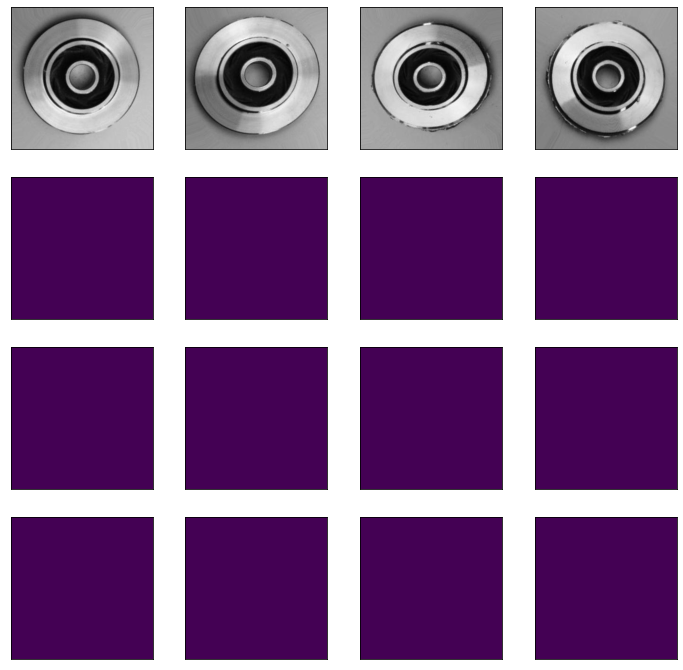

In [ ]:
layerOutputs = [layer.output for layer in imageModel.layers[:2]]

activationModel = tf.keras.models.Model(inputs=imageModel.input, outputs=layerOutputs)

nfig=4
images = lettersTest[:nfig]

activations=activationModel.predict(images)

nfilt=3

plt.figure(figsize=(12,12))

for i in range(nfig):
    plt.subplot(nfilt+1,nfig,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i,:,:], cmap='gray')

c=nfig+1
for i in range(nfilt):
    for j in range(nfig):
        plt.subplot(nfilt+1,nfig,c)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(activations[0][j, :, :, i], cmap='viridis')
        c+=1
        
plt.show()